In [2]:
from autoplot import *
import numpy as np
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft, fftfreq
from scipy.stats import norm
import math 
# Even de working directory veranderen omdat de notebook in een andere map staat dan de data.
import os
os.chdir('/work/2022_2023_round_09')

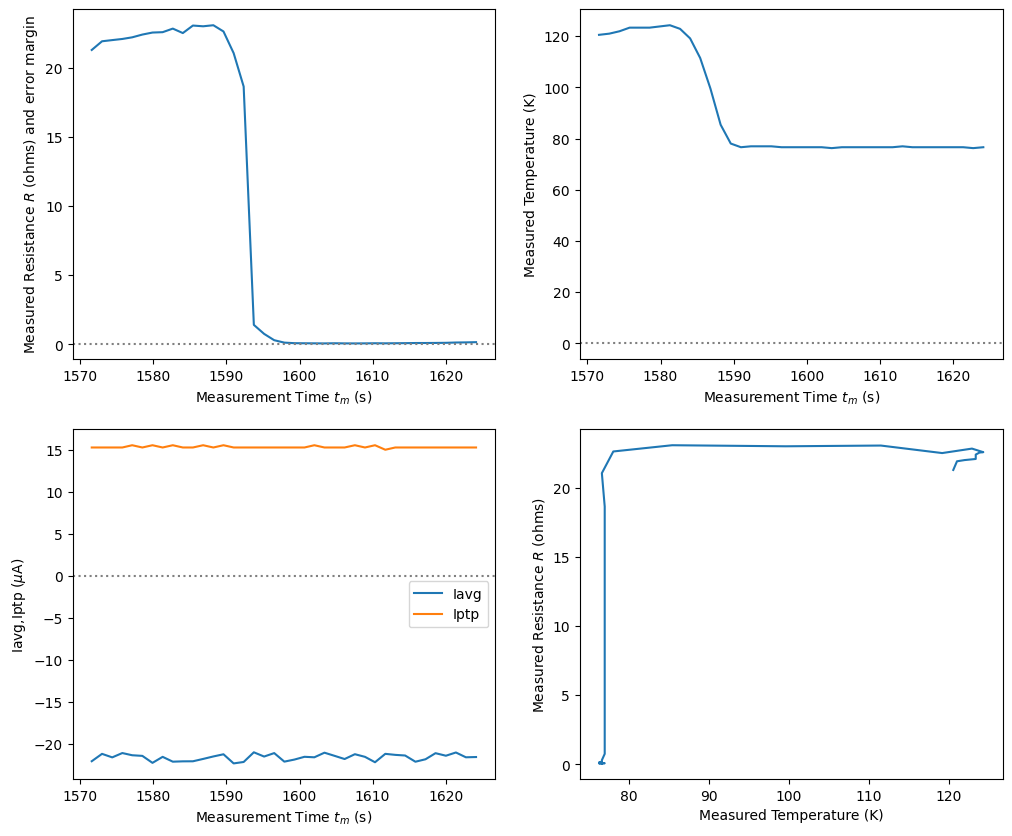

In [3]:
plot_R_T('/work/2022_2023_round_09/mrsquid_R_vs_T_2023-02-15-15_17_23.dat')

/tmp/ipykernel_76/1157043494.py:3: RuntimeWarning: invalid value encountered in power
  return (((x-a)**(1/3))*b)+c
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[76.28252438  1.47297901  1.84270917]


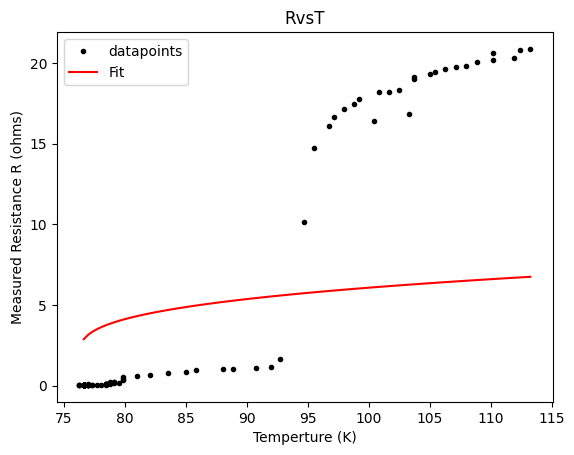

In [4]:
R,T,tm,Iavg,Iptp,Vavg,Vptp = np.loadtxt('/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_04_24.dat', unpack=True)
def     wortel3e(x,a,b,c):
    return (((x-a)**(1/3))*b)+c
popt,pcov=curve_fit(wortel3e,T,R)
x=np.linspace(T[0],T[-1],len(T))

print(popt)
plt.figure()
plt.plot(T,R,'k.',label="datapoints")
plt.plot(x,wortel3e(x,popt[0],popt[1],popt[2]),'r',label='Fit')
plt.xlabel("Temperture (K)")
plt.ylabel("Measured Resistance R (ohms)")
plt.legend()
plt.title("RvsT")
plt.show()
print()

In [5]:
R,T,tm,Iavg,Iptp,Vavg,Vptp = np.loadtxt('/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_04_24.dat', unpack=True)
plt.figure()
plt.plot(T,diff,'r',label="datapoints")
plt.xlabel("Temperture (K)")
plt.ylabel("Measured Resistance R (ohms)")
plt.legend()
plt.title("RvsT")
plt.show()

NameError: name 'diff' is not defined

<Figure size 640x480 with 0 Axes>

In [26]:
def maxdRdT(file):
    R,T,tm,Iavg,Iptp,Vavg,Vptp = np.loadtxt(file, unpack=True)
    diff=np.ones(len(R)-1)
    i=0
    T_2=np.ones(len(T)-1)
    while True:
       if T[i]-T[i+1] != 0  :
           diff[i]=(R[i]-R[i+1])/(T[i]-T[i+1])
       T_2[i]=(T[i]+T[i+1])/2 
       i += 1
       if i >= len(R)-1:
          break
    print(T_2[np.argmax(diff)])
    plt.subplots(figsize=(12,10))
    plt.subplot(221)
    plt.plot(tm,R)
    plt.axhline(0,ls=':',c='grey')
    plt.xlabel("Measurement Time $t_m$ (s)")
    plt.ylabel("Measured Resistance $R$ (ohms) and error margin")
    plt.subplot(222)
    plt.plot(tm,T)
    plt.axhline(0,ls=':',c='grey')
    plt.xlabel("Measurement Time $t_m$ (s)")
    plt.ylabel("Measured Temperature (K)")
    plt.subplot(223)
    plt.plot(T_2,diff)
    plt.axhline(0,ls=':',c='grey')
    plt.xlabel("T_2")
    plt.ylabel("dR/dT")
    plt.legend()
    plt.subplot(224)
    plt.plot(T,R)
    plt.ylabel("Measured Resistance $R$ (ohms)")
    plt.xlabel("Measured Temperature (K)")



84.11179168128858
/tmp/ipykernel_76/2987554383.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


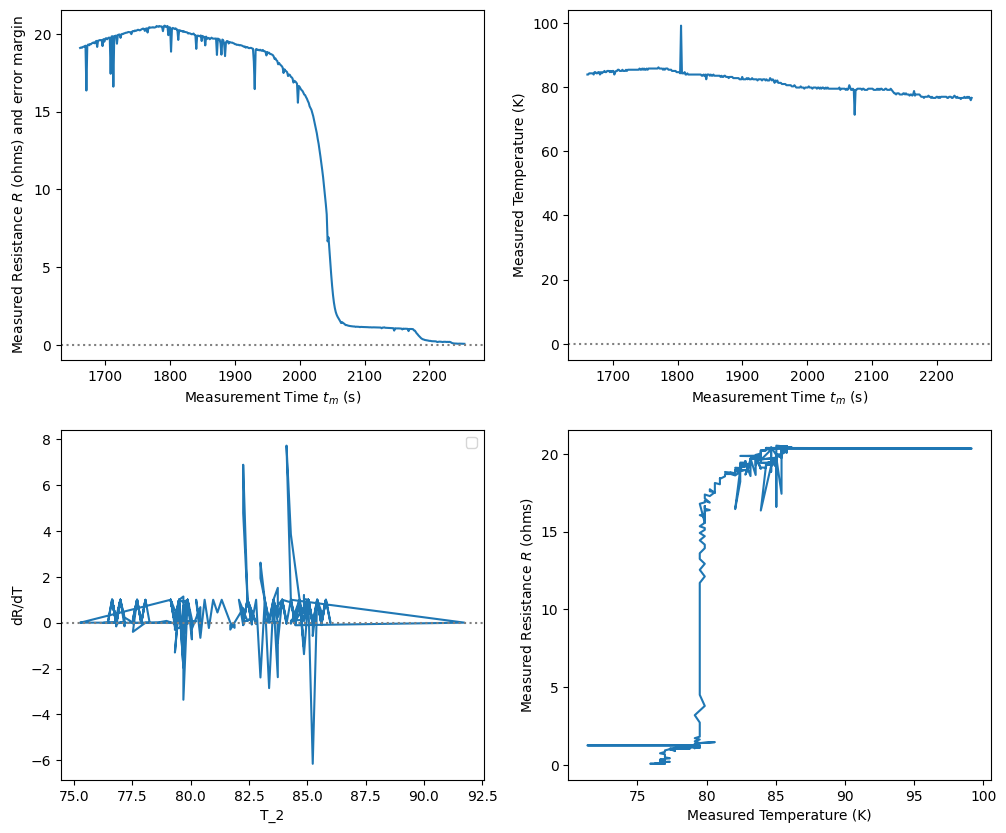

In [7]:
maxdRdT("/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-22-15_53_34.dat")

In [37]:

#all good ingreasing data
pure_increasing = np.array(["/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-14_59_26.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-14_59_32.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_04_24.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_04_31.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_08_32.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_16_27.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_57_40.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_57_53.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_59_09.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-17-16_35_10.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-22-15_43_39.dat"])

#all good degreasing data
pure_decreasing = np.array(["/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-14_30_42.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-14_30_55.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_01_26.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_02_12.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_05_09.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_14_06.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_17_23.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_19_29.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-16_11_00.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-16_11_38.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-16_11_51.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-16_12_57.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-16_14_37.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-17-15_28_03.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-17-16_44_53.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-22-15_53_34.dat"])
#all ingreasing max
all_ingreasing_max=np.array([76.63808193032511,
95.12316908735687,
90.97912994301993,
102.68943245938705,
82.99648617748429,
81.51955754651823,
81.1526972943164,])
#increasing no dubble
increasing_no_dubble = np.array(["/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-14_59_26.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_04_24.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_08_32.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_16_27.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_57_40.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-17-16_35_10.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-22-15_43_39.dat"])
#all degreasing max
all_degreasing_max = np.array([76.81626978522554,
76.99486868477395,
76.46030370267732,
120.77071545187333,
84.48560648514436,
81.1526972943164,
78.24836931353379,
84.11179168128858])
#decreasing no dubble
decreasing_no_dubble = np.array(["/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-14_30_42.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_05_09.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_14_06.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-15_19_29.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-15-16_11_00.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-17-15_28_03.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-17-16_44_53.dat",
"/work/RT DATA/rt good data/mrsquid_R_vs_T_2023-02-22-15_53_34.dat"])
#all_ingreasing_max_fix
all_ingreasing_max_fix=np.array([
95.12316908735687,
90.97912994301993,
95.5,
82.99648617748429,
81.51955754651823,
81.1526972943164,])
#all_degreasing_max_fix
all_degreasing_max_fix = np.array([76.81626978522554,
76.99486868477395,
76.46030370267732,
76.81626978522554,
84.48560648514436,
81.1526972943164,
78.24836931353379,
84.11179168128858])

/tmp/ipykernel_76/250903210.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.linspace(1,len(all_degreasing_max),len(all_degreasing_max)),all_degreasing_max,'k.',label="datapoints",c='red')
/tmp/ipykernel_76/250903210.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.linspace(1,len(all_ingreasing_max),len(all_ingreasing_max)),all_ingreasing_max,'k.',label="datapoints",c='blue')


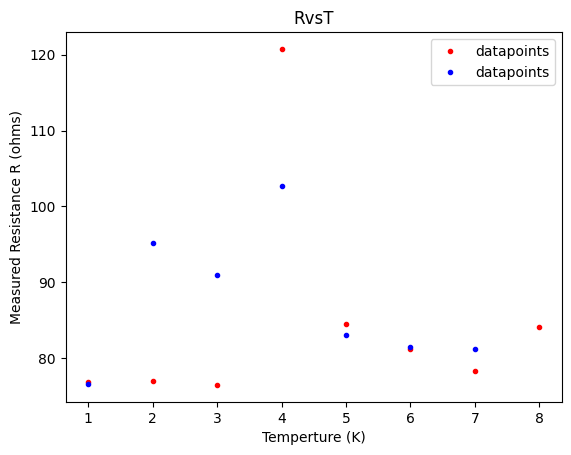

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure()
plt.plot(np.linspace(1,len(all_degreasing_max),len(all_degreasing_max)),all_degreasing_max,'k.',label="datapoints",c='red')
plt.plot(np.linspace(1,len(all_ingreasing_max),len(all_ingreasing_max)),all_ingreasing_max,'k.',label="datapoints",c='blue')
plt.xlabel("Temperture (K)")
plt.ylabel("Measured Resistance R (ohms)")
plt.legend()
plt.title("RvsT")

plt.show()


/tmp/ipykernel_76/3955247326.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.linspace(1,len(all_degreasing_max_fix),len(all_degreasing_max_fix)),all_degreasing_max_fix,'k.',label="decreasing",c='red')
/tmp/ipykernel_76/3955247326.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.linspace(1,len(all_ingreasing_max_fix),len(all_ingreasing_max_fix)),all_ingreasing_max_fix,'k.',label="increasing",c='blue')


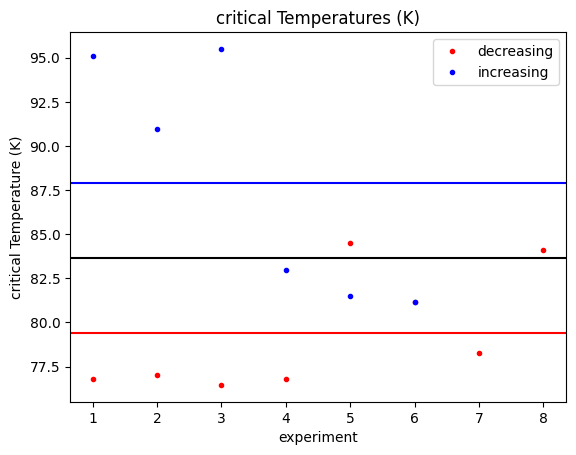

83.63213938315289


In [52]:

plt.figure()
plt.plot(np.linspace(1,len(all_degreasing_max_fix),len(all_degreasing_max_fix)),all_degreasing_max_fix,'k.',label="decreasing",c='red')
plt.axhline(np.average(all_ingreasing_max_fix),c='blue')
plt.plot(np.linspace(1,len(all_ingreasing_max_fix),len(all_ingreasing_max_fix)),all_ingreasing_max_fix,'k.',label="increasing",c='blue')
plt.axhline(np.average(all_degreasing_max_fix),c='red')
plt.axhline((np.average(all_degreasing_max_fix)+np.average(all_ingreasing_max_fix))/2,c='black')
plt.xlabel("experiment")
plt.ylabel("critical Temperature (K)")
plt.legend()
plt.title("critical Temperatures (K)")
plt.savefig('/work/figures/critical temperatures')
plt.show()
print((np.average(all_degreasing_max_fix)+np.average(all_ingreasing_max_fix))/2)

95.12316908735687
/tmp/ipykernel_76/2987554383.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


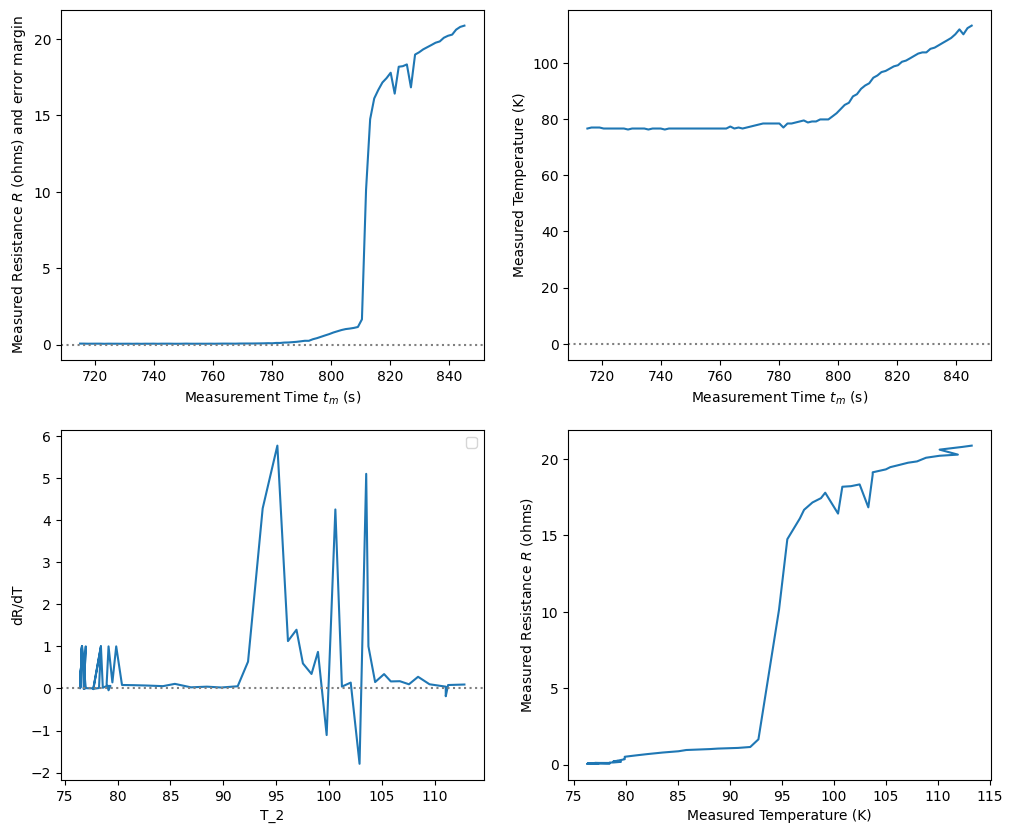

In [36]:
maxdRdT(increasing_no_dubble[1])



In [ ]:
i=0


In [0]:
we have meany different measurements for rt but also many varying results.
#the might be a lot of variation because of the location of thermometer
norm.cd

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7f259f03-5088-4677-bb0a-bf6373cc6341' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>